In [311]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [312]:
df1 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails1.csv")
df2 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails2.csv")

- First Trying to combine these two datasets

In [313]:
df1.shape
df1.sample(2)
# 2500 ham and 500 spam emails in the dataset.
# 1 = Spam 
# 0 = Not Spam
df1.label.value_counts()

0    2500
1     500
Name: label, dtype: int64

In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [315]:
df1.duplicated().sum()

127

In [316]:
df1 = df1.drop_duplicates()


---
---

In [317]:
df2.shape
# df2.sample(2)
# 0 = not spam 
# 1 = spam

(5736, 2)

In [318]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.8+ KB


In [319]:
df2.spam.value_counts()

0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [320]:
#let's discard them
zeros = df2[df2['spam']=='0']
ones = df2[df2['spam']=='1']
zeros['spam'].value_counts()
ones['spam'].value_counts()

1    1367
Name: spam, dtype: int64

In [321]:
df2 = pd.concat([zeros, ones], axis=0)
# df2.shape

In [322]:
df2['spam'].value_counts()

0    4359
1    1367
Name: spam, dtype: int64

In [323]:
df2.duplicated().sum()

33

In [324]:
#let's first drop duplicates
df2 = df2.drop_duplicates()

it hase 2 dimension, so it's combine these.

In [325]:
print(df1.shape)
print(df2.shape)


(2873, 2)
(5693, 2)


In [326]:
df1.rename(columns={'email':'text', 'label':'label'}, inplace=True)
df2.rename(columns={'spam':'label'}, inplace=True)

In [327]:
df2.label = df2.label.astype('int32')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


In [328]:
frames = [df1, df2]
df = pd.concat(frames)
df.shape

(8566, 2)

---

# **EDA**

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8566 entries, 0 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8565 non-null   object
 1   label   8566 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 200.8+ KB


In [330]:
## let's see missing values
df.isnull().sum()

text     1
label    0
dtype: int64

In [331]:
df = df.dropna()
df.isnull().sum()

text     0
label    0
dtype: int64

In [332]:
# let's see duplicates
df.duplicated().sum()

0

## let's focus on label data


In [333]:
df.label.describe()

count    8565.000000
mean        0.209457
std         0.406945
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64

In [334]:
df.label.unique()

array([0, 1], dtype=int64)

In [335]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


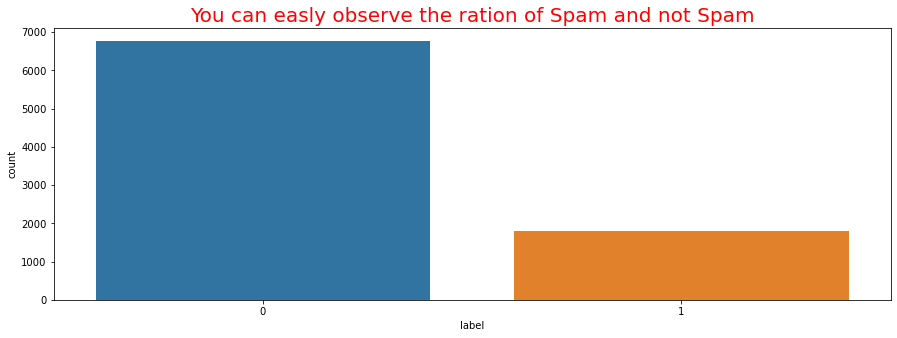

In [347]:
plt.figure(figsize=(15,5))
sns.countplot(df.label)
plt.title("You can easly observe the ration of Spam and not Spam", size=20, color='r')
plt.show()

## let's focus on Text

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8565 entries, 0 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8565 non-null   object
 1   label   8565 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 200.7+ KB


In [350]:
df.text.nunique()

8565

In [355]:
df.text[0]

0     date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
0    Subject: naturally irresistible your corporate...
Name: text, dtype: object